# Spatial operations

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

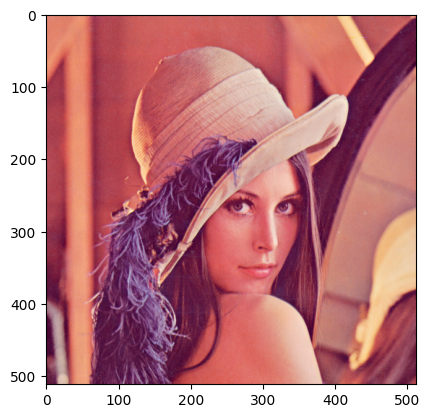

In [2]:
# Load image
image = cv2.imread('../../data/lenna_test_image.png')

# Convert from BGR-space to RGB-space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image)
plt.show()

## Mean filter

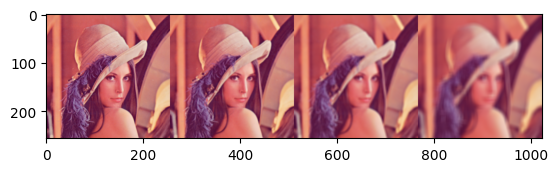

In [3]:
# Define convolutional kernel
kernel = np.ones((3, 3), np.float32) / 9
result = cv2.filter2D(image, -1, kernel)
result = cv2.resize(result, (0, 0), None, .5, .5)

# Define convolutional kernel
kernel1 = np.ones((5, 5), np.float32) / 25
result1 = cv2.filter2D(image, -1, kernel1)
result1 = cv2.resize(result1, (0, 0), None, .5, .5)

# Define convolutional kernel
kernel2 = np.ones((10, 10), np.float32) / 100
result2 = cv2.filter2D(image, -1, kernel2)
result2 = cv2.resize(result2, (0, 0), None, .5, .5)

# Define convolutional kernel
kernel3 = np.ones((20, 20), np.float32) / 400
result3 = cv2.filter2D(image, -1, kernel3)
result3 = cv2.resize(result3, (0, 0), None, .5, .5)

# Concatenate results
result = np.concatenate((result, result1, result2, result3), axis=1)

# Shiow images
plt.imshow(result)
plt.show()


## Gaussian filter

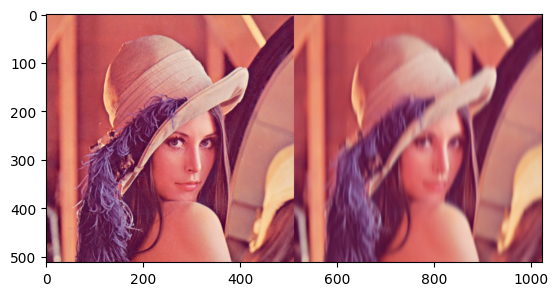

In [4]:
# Perform convolution
result = cv2.GaussianBlur(image, (3, 33), 0)

# Concatenate images
result = np.concatenate((image, result), axis=1)

# Shiow images
plt.imshow(result)
plt.show()

## Sharpening

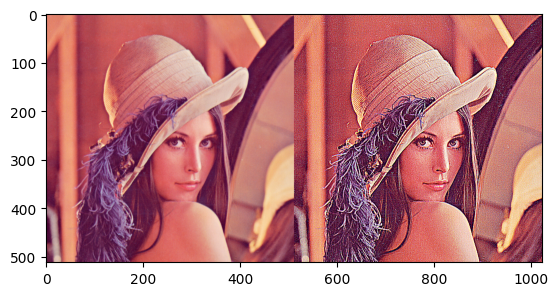

In [5]:
# Define convolutional kernel
kernel = np.ones((3, 3), np.float32) * -1
kernel[1][1] = 9

# Perform convolution
result = cv2.filter2D(image, -1, kernel)

# Concatenate images
result = np.concatenate((image, result), axis=1)

# Show images
plt.imshow(result)
plt.show()